# Pytorch Exercise

[Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

## Tensor
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to Numpy's ndarrays, but tensors can run on GPUs or other specialized hardware to accelerate computing.


### Initialize tensors

> 1. Directly from data

In [1]:
import torch
import numpy as np

In [2]:
data = [[1, 2], [3, 4]]
x = torch.tensor(data)
x

tensor([[1, 2],
        [3, 4]])

> 2. Create from Numpy ndarrays

In [3]:
data = np.array(data)
x_np = torch.from_numpy(data)
x_np

tensor([[1, 2],
        [3, 4]])

3. From another tensors

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.

[torch.ones_like](https://pytorch.org/docs/stable/generated/torch.ones_like.htmla): Returns a tensor filled with the scalar value 1, with the same size as input.

[torch.rand_like](https://pytorch.org/docs/stable/generated/torch.rand_like.html): Returns a tensor with the same size as input that is filled with random numbers from a uniform distribution on the interval [0,1).

In [4]:
x_new = torch.ones_like(x)
print(x_new)
x_float = torch.ones_like(x, dtype=torch.float)
print(x_float)
x_rand = torch.rand_like(x, dtype=torch.float)
print(x_rand)

tensor([[1, 1],
        [1, 1]])
tensor([[1., 1.],
        [1., 1.]])
tensor([[0.0706, 0.6979],
        [0.6434, 0.3060]])


**With random or constant valuess**

`shape` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.

[`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html): Returns a tensor filled with random numbers from a uniform distribution on the interval [0, 1).

[`torch.ones`](https://pytorch.org/docs/stable/generated/torch.ones.html): Returns a tensor filled with the scalar value 1, with the shape defined by the variable argument `size`.

[`torch.zeros`](https://pytorch.org/docs/stable/generated/torch.zeros.html): Returns a tensor filled with the scalar value 0, with the shape defined by the variable argument `size`.

In [5]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2375, 0.2179, 0.8755],
        [0.1408, 0.0858, 0.6067]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


**What is a device in Pytorch?**

[Struct Device](https://pytorch.org/cppdocs/api/structc10_1_1_device.html): Represents a a compute device on which a tensor is located, e.g. CPU or CUDA GPU.

**To use GPU**

In [6]:
if torch.cuda.is_available():
  x_rand = x_rand.to('cuda')
  print(x_rand.device)

cuda:0


**Concatenate tensors**

[torch.cat](https://pytorch.org/docs/stable/generated/torch.cat.html): Concatenates the given sequence of seq tensors in the given dimension. All tensors must either have the **same shape** (except in the concatenating dimension) or be empty.

[torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html): Concatenates a sequence of tensors along a new dimension. All tensors need to be of the same size.

In [7]:
t0 = torch.cat([x_rand, x_rand], 0)
print(t0)
t1 = torch.cat([x_rand, x_rand], 1)
print(t1)

tensor([[0.0706, 0.6979],
        [0.6434, 0.3060],
        [0.0706, 0.6979],
        [0.6434, 0.3060]], device='cuda:0')
tensor([[0.0706, 0.6979, 0.0706, 0.6979],
        [0.6434, 0.3060, 0.6434, 0.3060]], device='cuda:0')


In [8]:
t2 = torch.stack([x_rand, x_rand], 1)
t2

tensor([[[0.0706, 0.6979],
         [0.0706, 0.6979]],

        [[0.6434, 0.3060],
         [0.6434, 0.3060]]], device='cuda:0')

**Multiplying tensors**

[torch.mul](https://pytorch.org/docs/stable/generated/torch.mul.html)

or

`tensor * tensor`

In [9]:
print("tensor * tensor: \n", t1 * t1)
print("\ntorch.mul(tensor, tensor): \n", torch.mul(t1, t1))

tensor * tensor: 
 tensor([[0.0050, 0.4871, 0.0050, 0.4871],
        [0.4140, 0.0936, 0.4140, 0.0936]], device='cuda:0')

torch.mul(tensor, tensor): 
 tensor([[0.0050, 0.4871, 0.0050, 0.4871],
        [0.4140, 0.0936, 0.4140, 0.0936]], device='cuda:0')


**Matrix multiplication**

[torch.matmul](https://pytorch.org/docs/stable/generated/torch.matmul.html): Matrix product of two tensors.

or

`tensor @ tensor`

In [10]:
print("tensor @ tensor: \n", t1 @ t1.T)
print("\ntorch.matmul: \n", torch.matmul(t1, t1.T))

tensor @ tensor: 
 tensor([[0.9841, 0.5179],
        [0.5179, 1.0151]], device='cuda:0')

torch.matmul: 
 tensor([[0.9841, 0.5179],
        [0.5179, 1.0151]], device='cuda:0')


**In-place**

Operations that have a `_` suffix are in-place. For example: `x.copy_(y)`, `x.t_()`, will change x.

[t1.add_()](https://pytorch.org/docs/stable/generated/torch.Tensor.add_.html): In-place version of `add()` 

In [11]:
print(t1)
print("\nt1.add_(5): \n", t1.add_(5))

tensor([[0.0706, 0.6979, 0.0706, 0.6979],
        [0.6434, 0.3060, 0.6434, 0.3060]], device='cuda:0')

t1.add_(5): 
 tensor([[5.0706, 5.6979, 5.0706, 5.6979],
        [5.6434, 5.3060, 5.6434, 5.3060]], device='cuda:0')


**Bridge with NumPy**

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and **changing one will change the other**.

> **Tensor to Numpy array**

In [12]:
shape = (5,)
t = torch.ones(shape)
n = t.numpy()
print(n)

[1. 1. 1. 1. 1.]


In [13]:
t.add_(1)
print(f"Tensor: {t}\n")
print(f"Numpy array: {n}")

Tensor: tensor([2., 2., 2., 2., 2.])

Numpy array: [2. 2. 2. 2. 2.]




> **Numpy array to Tensor**

In [14]:
n1 = np.ones(5)
t3 = torch.from_numpy(n1)
print(f"Numpy Array: {n1}\n")
print(f"Tensor: {t3}")

Numpy Array: [1. 1. 1. 1. 1.]

Tensor: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [15]:
n = np.add(n1, 3, out=n1) # https://numpy.org/doc/stable/reference/generated/numpy.add.html
print(f"Numpy Array: {n1}\n")
print(f"Tensor: {t3}")

Numpy Array: [4. 4. 4. 4. 4.]

Tensor: tensor([4., 4., 4., 4., 4.], dtype=torch.float64)


In [16]:
t

tensor([2., 2., 2., 2., 2.])

## AutoGrad

[A Gentle Introduction to torch.autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#a-gentle-introduction-to-torch-autograd)

`torch.autograd`: PyTorch’s automatic differentiation engine that powers neural network training

**Neural networks (NNs)** are a collection of nested functions that are executed on some input data. These functions are defined by parameters (consisting of weights and biases), which in PyTorch are stored in tensors.

> **Training a NN happens in two steps:**

**Forward Propagation**: In forward prop, the NN makes its best guess about the correct output. It runs the input data through each of its functions to make this guess.

**Backward Propagation**: In backprop, the NN adjusts its parameters proportionate to the error in its guess. It does this by traversing backwards from the output, **collecting the derivatives of the error with respect to the parameters of the functions (gradients)**, and **optimizing the parameters using gradient descent**. 

In [17]:
'''
We load a pretrained resnet18 model from torchvision.
resnet18: https://pytorch.org/hub/pytorch_vision_resnet/

We create a random data tensor to represent a single image with 3 channels, 
and height & width of 64, and its corresponding label initialized to some random values.

Channels: Number of colours of the images.
'''

import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
data = torch.rand([1, 3, 64, 64])
print(f"Data: {data}\n")
label = torch.rand(1, 1000)
print(f"Label: {label}")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Data: tensor([[[[0.9246, 0.2989, 0.1009,  ..., 0.5176, 0.5625, 0.8333],
          [0.9101, 0.5100, 0.8397,  ..., 0.0225, 0.5520, 0.3209],
          [0.2722, 0.3762, 0.7924,  ..., 0.7289, 0.9018, 0.6407],
          ...,
          [0.5756, 0.4627, 0.6511,  ..., 0.9254, 0.4380, 0.5949],
          [0.4591, 0.0194, 0.7919,  ..., 0.4100, 0.3505, 0.9790],
          [0.7150, 0.0505, 0.1310,  ..., 0.5849, 0.6567, 0.5429]],

         [[0.0548, 0.1362, 0.8384,  ..., 0.5212, 0.1000, 0.2554],
          [0.7237, 0.0849, 0.1547,  ..., 0.0751, 0.0107, 0.4894],
          [0.3348, 0.1445, 0.2069,  ..., 0.3742, 0.4749, 0.8630],
          ...,
          [0.1167, 0.8800, 0.9253,  ..., 0.6426, 0.0982, 0.8630],
          [0.7441, 0.6138, 0.7221,  ..., 0.6254, 0.9300, 0.6300],
          [0.4445, 0.1639, 0.3304,  ..., 0.3671, 0.3076, 0.1152]],

         [[0.5336, 0.8634, 0.4703,  ..., 0.2744, 0.6872, 0.6266],
          [0.3061, 0.0698, 0.2608,  ..., 0.9561, 0.4219, 0.0792],
          [0.5884, 0.5117, 0.3433,  

In [18]:
predict = resnet18(data)  # Forward pass
predict

tensor([[-7.2284e-01, -3.1396e-01, -6.2205e-01, -1.2614e+00, -5.5684e-01,
          5.2522e-02, -1.0537e-02,  3.1060e-01,  5.5016e-01, -5.3370e-01,
         -1.4686e+00, -1.3068e+00, -3.5701e-01, -1.1041e+00, -1.2913e+00,
         -6.8379e-01, -8.2431e-01, -3.8348e-01, -6.9276e-01, -8.1445e-01,
         -1.5153e+00, -9.7048e-01, -1.5734e+00,  2.3151e-01, -9.5042e-01,
         -1.1701e+00, -8.8455e-01, -1.1609e+00, -9.4618e-01, -1.5198e-01,
         -7.2018e-01, -6.9228e-01, -2.8297e-01, -2.6625e-01, -8.6333e-02,
         -1.2576e-01,  7.8864e-01, -5.3523e-01, -6.5943e-01,  2.2424e-02,
         -8.5749e-01, -8.2222e-01, -1.0461e+00, -4.3593e-01, -6.5197e-01,
         -3.9199e-01, -8.3963e-01, -6.2289e-01, -1.3658e+00, -9.7360e-01,
         -4.5225e-01,  4.1784e-01, -2.2360e-01, -5.9253e-01, -3.1470e-01,
         -1.2164e+00, -4.5799e-01, -1.3753e+00, -2.8766e-01, -5.4164e-01,
          9.2773e-01,  1.2264e-01,  1.7797e-02,  3.6905e-01, -6.7976e-01,
         -1.0668e-01, -3.2968e-01, -2.

We use the model’s prediction and the corresponding label to calculate the error (`loss`). 

The next step is to backpropagate this error through the network. Backward propagation is kicked off when we call `.backward()` on the error tensor. *Autograd* then calculates and stores the gradients for each model parameter in the parameter’s `.grad` attribute.

In [19]:
loss = predict - label
loss.sum().backward() # backward pass

Next, we load an **optimizer**, in this case SGD with a *learning rate* of 0.01 and *momentum* of 0.9. We register all the parameters of the model in the optimizer.

In [20]:
optim = torch.optim.SGD(resnet18.parameters(), lr=1e-2, momentum=0.9)

Finally, we call `.step()` to initiate gradient descent. The optimizer adjusts each parameter by its gradient stored in `.grad`.

In [21]:
optim.step() #gradient descent

## Neural Networks

[Neural Networks](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#neural-networks)

Neural networks can be constructed using the `torch.nn` package. 

`nn` depends on `autograd` to define models and differentiate them. An `nn.Module` contains layers, and a method `forward(input)` that returns the `output`.

A typical training procedure for a neural network is as follows:

    1. Define the neural network that has some learnable parameters (or weights)
    2. Iterate over a dataset of inputs
    3. Process input through the network
    4. Compute the loss (how far is the output from being correct)
    5. Propagate gradients back into the network’s parameters
    6. Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient


Here we construct a simple **Feed-Foward Neural Network**. It takes the input, feeds it through several layers one after the other, and then finally gives the output.

[Conventions of Covolutional Neural Networks](https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7)

In [22]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.conv2 = nn.Conv2d(6, 12, 5)
    self.fc1 = nn.Linear(12 * 5 * 5, 50)  # 5*5 from image dimension
    self.fc2 = nn.Linear(50, 30)
    self.fc3 = nn.Linear(30, 10)
  def forward(self, source):
    source = F.max_pool2d(F.relu(self.conv1(source)), (2, 2))
    source = F.max_pool2d(F.relu(self.conv2(source)), 2)
    source = torch.flatten(source, 1)
    source = F.relu(self.fc1(source))
    source = F.relu(self.fc2(source))
    source = self.fc3(source)
    return source
  
net = Network()
print(net)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=300, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=10, bias=True)
)


In [23]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0998,  0.1806,  0.1081, -0.0550,  0.0706, -0.0554, -0.1356,  0.1569,
          0.0452,  0.0678]], grad_fn=<AddmmBackward0>)


In [24]:
net.zero_grad()
out.backward(torch.randn(1, 10))

## Image Classification

[Training a classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-a-classifier)

We will use the CIFAR10 dataset. It has the classes: `airplane`, `automobile`, `‘bird’`, `cat`, `deer`, `dog`, `frog`, `horse`, `ship`, `truck`. The images in CIFAR-10 are of size *3x32x32*, i.e. **3-channel color images of 32x32 pixels in size**.

We will do the following steps in order:

    1. Load and normalize the CIFAR10 training and test datasets using torchvision 
    (We transform them to Tensors of normalized range [-1, 1].)
    2. Define a Convolutional Neural Network
    3. Define a loss function
    4. Train the network on the training data
    5. Test the network on the test data


---
> We need to transform PIL.Image into tensors to read data, and vice versa for data output.

We can use [`transforms.ToTensor()`](https://pytorch.org/vision/master/generated/torchvision.transforms.ToTensor.html) to transform PIL.Image/numpy.ndarray into torch.FloadTensor, and normalize to $[0, 1.0]$：

    - PIL.Image in [0, 255] will be transformed into 
      FloatTensor with shape of [C, H, W] and range of [0, 1.0];
    - numpy.ndarray with shape of [H, W, C] will be transformed into 
      FloatTensor with shape of [C, H, W] and range of [0, 1.0]


1. We usually use `transforms.Compose` to combine transforms.
2. `transforms.Normalize` use the equation below to normalize:

$$ channel=（channel-mean）/ std$$

As such, every element in our data turns into a value with range of [-1, 1].

[Reference1](https://zhuanlan.zhihu.com/p/27382990)

In [25]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean = (0.5, 0.5, 0.5), std = (0.5, 0.5, 0.5))
])

batch_size = 4

train = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)   # https://pytorch.org/vision/stable/datasets.html#torchvision-datasets
trainLoader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=4)   # https://pytorch.org/docs/stable/data.html


test = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)
testLoader = torch.utils.data.DataLoader(test, batch_size=4, shuffle=True, num_workers=4)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Files already downloaded and verified


In [26]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


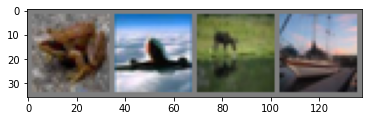

 frog plane  deer  ship


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as utils

def imshow(img):
    img = img / 2 + 0.5 
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainLoader)
images, labels = dataiter.next()

imshow(utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [35]:
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5* 5, 120)  # 5*5 from image dimension
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  def forward(self, source):
    source = F.max_pool2d(F.relu(self.conv1(source)), (2, 2))
    source = F.max_pool2d(F.relu(self.conv2(source)), 2)
    source = torch.flatten(source, 1)
    source = F.relu(self.fc1(source))
    source = F.relu(self.fc2(source))
    source = self.fc3(source)
    return source
  
net = Network()

In [36]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [41]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f786c846320>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f786c846320>
    if w.is_alive():
Traceback (most recent call last):
  File "/usr/lib/python3.7/mul

[1,  2000] loss: 0.521
[1,  4000] loss: 0.537
[1,  6000] loss: 0.600
[1,  8000] loss: 0.605
[1, 10000] loss: 0.654
[1, 12000] loss: 0.626
[2,  2000] loss: 0.499
[2,  4000] loss: 0.557
[2,  6000] loss: 0.585
[2,  8000] loss: 0.614
[2, 10000] loss: 0.609
[2, 12000] loss: 0.622
[3,  2000] loss: 0.550
[3,  4000] loss: 0.575
[3,  6000] loss: 0.576
[3,  8000] loss: 0.572
[3, 10000] loss: 0.609
[3, 12000] loss: 0.623
[4,  2000] loss: 0.508
[4,  4000] loss: 0.540
[4,  6000] loss: 0.551
[4,  8000] loss: 0.605
[4, 10000] loss: 0.618
[4, 12000] loss: 0.627
[5,  2000] loss: 0.516
[5,  4000] loss: 0.532
[5,  6000] loss: 0.578
[5,  8000] loss: 0.631
[5, 10000] loss: 0.633
[5, 12000] loss: 0.611
[6,  2000] loss: 0.504
[6,  4000] loss: 0.548
[6,  6000] loss: 0.552
[6,  8000] loss: 0.628
[6, 10000] loss: 0.611
[6, 12000] loss: 0.647
[7,  2000] loss: 0.513
[7,  4000] loss: 0.585
[7,  6000] loss: 0.566
[7,  8000] loss: 0.610
[7, 10000] loss: 0.591
[7, 12000] loss: 0.639
[8,  2000] loss: 0.503
[8,  4000] 

In [44]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


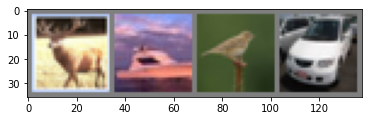

GroundTruth:   deer  ship  bird   car


In [42]:
dataiter = iter(testLoader)
images, labels = dataiter.next()

# print images
imshow(utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [46]:
net = Network()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   deer  ship  deer   car


In [48]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of the network on the 10000 test images: 58 %


In [50]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy for class plane is: 65.2 %
Accuracy for class car   is: 76.2 %
Accuracy for class bird  is: 42.3 %
Accuracy for class cat   is: 43.4 %
Accuracy for class deer  is: 47.4 %
Accuracy for class dog   is: 45.0 %
Accuracy for class frog  is: 70.2 %
Accuracy for class horse is: 60.7 %
Accuracy for class ship  is: 71.6 %
Accuracy for class truck is: 66.9 %
